In [1]:
# 분석에 필요한 패키지 로드
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = 'C:/Windows/Fonts/정직_1.ttf'
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\모델제작용데이터셋(헬스케어).csv')

In [3]:
for i in df.columns:
    df[i] = df[i].astype('category')
df.dtypes

성별코드      category
연령대코드     category
시도코드      category
서식코드      category
진료과목코드    category
주상병코드     category
부상병코드     category
심결가산율     category
dtype: object

In [4]:
df.columns

Index(['성별코드', '연령대코드', '시도코드', '서식코드', '진료과목코드', '주상병코드', '부상병코드', '심결가산율'], dtype='object')

In [5]:
print(f"전체환자 데이터 수 : {len(df)} / 입원환자 데이터 수 : {len(df[df['서식코드'] == 1])} / 비입원환자 데이터 수 : {len(df[df['서식코드'] == 0])}")

전체환자 데이터 수 : 13178345 / 입원환자 데이터 수 : 283962 / 비입원환자 데이터 수 : 12894383


In [6]:
# 교차분석을 위한 패키지로드 / 코드 참고 : https://lovelydiary.tistory.com/364
from scipy.stats import chi2_contingency

# 성별과 서식 교차분석
# 귀무가설 : 두 변수는 독립
sex_ct = pd.crosstab(df['성별코드'], df['서식코드'], margins = False) # margin을 True를 넣으면 빈도수의 합까지 출력해줌

# crosstab 객체의 margins=False여야 correction=True를 적용하면 Yates' correction이 적용 되어 검정통계량이 보수적으로 더 낮게 나옴
result_sex = chi2_contingency(observed = sex_ct, correction=False)
print("* 성별과 입원여부의 상관성 분석")
print("1. 카이제곱 통계량:", result_sex[0])
print("2. p-value:", result_sex[1]) # p-value의 값이 0.05보다 낮으면 두 변수는 독립이 아님.(귀무가설 기각) - 연관이 있음.
print("3. df:", result_sex[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result_sex[3]).rename(index={0:'남자', 1:'여자'}, columns={0:'비입원', 1:'입원'})

* 성별과 입원여부의 상관성 분석
1. 카이제곱 통계량: 63.73445258300231
2. p-value: 1.4237276093936452e-15
3. df: 1


In [7]:
sido_ct = pd.crosstab(df['시도코드'], df['서식코드'], margins = False) # margin을 True를 넣으면 빈도수의 합까지 출력해줌

# crosstab 객체의 margins=False여야 correction=True를 적용하면 Yates' correction이 적용 되어 검정통계량이 보수적으로 더 낮게 나옴
result_sido = chi2_contingency(observed = sido_ct, correction=False)
print("* 거주지역과 입원여부의 상관성 분석")
print("1. 카이제곱 통계량:", result_sido[0])
print("2. p-value:", result_sido[1]) # p-value의 값이 0.05보다 낮으면 두 변수는 독립이 아님. - 연관이 있음.
print("3. df:", result_sido[2]) #(행의개수-1)*(열의개수-1)

* 거주지역과 입원여부의 상관성 분석
1. 카이제곱 통계량: 15515.044935827773
2. p-value: 0.0
3. df: 16


In [8]:
age_ct = pd.crosstab(df['연령대코드'], df['서식코드'], margins = False) # margin을 True를 넣으면 빈도수의 합까지 출력해줌

# crosstab 객체의 margins=False여야 correction=True를 적용하면 Yates' correction이 적용 되어 검정통계량이 보수적으로 더 낮게 나옴
result_age = chi2_contingency(observed = age_ct, correction=False)
print("* 연령대와 입원여부의 상관성 분석")
print("1. 카이제곱 통계량:", result_age[0])
print("2. p-value:", result_age[1]) # p-value의 값이 0.05보다 낮으면 두 변수는 독립이 아님. - 연관이 있음.
print("3. df:", result_age[2]) #(행의개수-1)*(열의개수-1)

* 연령대와 입원여부의 상관성 분석
1. 카이제곱 통계량: 98529.54872519782
2. p-value: 0.0
3. df: 17


In [9]:
ds_ct = pd.crosstab(df['진료과목코드'], df['서식코드'], margins = False) # margin을 True를 넣으면 빈도수의 합까지 출력해줌

# crosstab 객체의 margins=False여야 correction=True를 적용하면 Yates' correction이 적용 되어 검정통계량이 보수적으로 더 낮게 나옴
result_ds = chi2_contingency(observed = ds_ct, correction=False)
print("* 진료과목과 입원여부의 상관성 분석")
print("1. 카이제곱 통계량:", result_ds[0])
print("2. p-value:", result_ds[1]) # p-value의 값이 0.05보다 낮으면 두 변수는 독립이 아님. - 연관이 있음.
print("3. df:", result_ds[2]) #(행의개수-1)*(열의개수-1)

* 진료과목과 입원여부의 상관성 분석
1. 카이제곱 통계량: 322817.0802463987
2. p-value: 0.0
3. df: 32


In [10]:
dsbjt1_ct = pd.crosstab(df['주상병코드'], df['서식코드'], margins = False) # margin을 True를 넣으면 빈도수의 합까지 출력해줌

# crosstab 객체의 margins=False여야 correction=True를 적용하면 Yates' correction이 적용 되어 검정통계량이 보수적으로 더 낮게 나옴
result_dsbjt1 = chi2_contingency(observed = dsbjt1_ct, correction=False)
print("* 주상병코드와 입원여부의 상관성 분석")
print("1. 카이제곱 통계량:", result_dsbjt1[0])
print("2. p-value:", result_dsbjt1[1]) # p-value의 값이 0.05보다 낮으면 두 변수는 독립이 아님. - 연관이 있음.
print("3. df:", result_dsbjt1[2]) #(행의개수-1)*(열의개수-1)

* 주상병코드와 입원여부의 상관성 분석
1. 카이제곱 통계량: 442772.5674788981
2. p-value: 0.0
3. df: 21


In [11]:
dsbjt2_ct = pd.crosstab(df['부상병코드'], df['서식코드'], margins = False) # margin을 True를 넣으면 빈도수의 합까지 출력해줌

# crosstab 객체의 margins=False여야 correction=True를 적용하면 Yates' correction이 적용 되어 검정통계량이 보수적으로 더 낮게 나옴
result_dsbjt2 = chi2_contingency(observed = dsbjt2_ct, correction=False)
print("* 부상병코드와 입원여부의 상관성 분석")
print("1. 카이제곱 통계량:", result_dsbjt2[0])
print("2. p-value:", result_dsbjt2[1]) # p-value의 값이 0.05보다 낮으면 두 변수는 독립이 아님. - 연관이 있음.
print("3. df:", result_dsbjt2[2]) #(행의개수-1)*(열의개수-1)

* 부상병코드와 입원여부의 상관성 분석
1. 카이제곱 통계량: 338266.4256146522
2. p-value: 0.0
3. df: 25


In [12]:
rate_ct = pd.crosstab(df['심결가산율'], df['서식코드'], margins = False) # margin을 True를 넣으면 빈도수의 합까지 출력해줌

# crosstab 객체의 margins=False여야 correction=True를 적용하면 Yates' correction이 적용 되어 검정통계량이 보수적으로 더 낮게 나옴
result_rate = chi2_contingency(observed = rate_ct, correction=False)
print("* 심결가산율과 입원여부의 상관성 분석")
print("1. 카이제곱 통계량:", result_rate[0])
print("2. p-value:", result_rate[1]) # p-value의 값이 0.05보다 낮으면 두 변수는 독립이 아님. - 연관이 있음.
print("3. df:", result_rate[2]) #(행의개수-1)*(열의개수-1)

* 심결가산율과 입원여부의 상관성 분석
1. 카이제곱 통계량: 743745.5481217931
2. p-value: 0.0
3. df: 4


In [13]:
# 출처 : https://g0n1.tistory.com/34
# 클래스 불균형 처리를 해주는 imbalanced-learn를 호출
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# ros, rus 객체
ros = RandomOverSampler()
rus = RandomUnderSampler()

In [14]:
# Over 샘플링
# oversampled_data, oversampled_label = ros.fit_resample(df[['성별코드', '연령대코드', '시도코드', '진료과목코드', '주상병코드', '부상병코드','심결가산율']].copy(), df[['서식코드']].copy())
# oversampled_data = pd.DataFrame(oversampled_data, columns = df.columns)

# Under 샘플링
undersampled_data, undersampled_label = rus.fit_resample(df[['성별코드', '연령대코드', '시도코드', '진료과목코드', '주상병코드', '부상병코드','심결가산율']].copy(), df[['서식코드']].copy())
undersampled_data = pd.DataFrame(undersampled_data, columns =['성별코드', '연령대코드', '시도코드', '진료과목코드', '주상병코드', '부상병코드','심결가산율'])

In [15]:
undersampled_data['서식코드'] = undersampled_label
undersampled_data.head()

,성별코드,연령대코드,시도코드,진료과목코드,주상병코드,부상병코드,심결가산율,서식코드
0,2,16,11,5,12,12,1,0
1,2,12,41,5,12,4,1,0
2,1,10,42,1,10,10,1,0
3,2,3,41,11,9,9,1,0
4,2,16,11,1,4,8,1,0


In [18]:
print(f"전체환자 데이터 수 : {len(undersampled_data)} / 입원환자 데이터 수 : {len(undersampled_data[undersampled_data['서식코드'] == 1])} / 비입원환자 데이터 수 : {len(undersampled_data[undersampled_data['서식코드'] == 0])}")

전체환자 데이터 수 : 567924 / 입원환자 데이터 수 : 283962 / 비입원환자 데이터 수 : 283962


In [19]:
df_train1 = undersampled_data[['서식코드']].copy() # 테스트로 사용할 컬럼들
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data
dummy_columns = ['서식코드']
df_train1_dummy = dummy_data(undersampled_data, dummy_columns)
df_train1_dummy

,성별코드,연령대코드,시도코드,진료과목코드,주상병코드,부상병코드,심결가산율,서식코드_0,서식코드_1
0,2,16,11,5,12,12,1,1,0
1,2,12,41,5,12,4,1,1,0
2,1,10,42,1,10,10,1,1,0
3,2,3,41,11,9,9,1,1,0
4,2,16,11,1,4,8,1,1,0
...,...,...,...,...,...,...,...,...,...
567919,1,16,42,1,12,3,3,0,1
567920,1,6,11,5,18,18,2,0,1
567921,1,4,47,24,17,17,4,0,1
567922,2,1,47,11,15,15,3,0,1


In [20]:
df_train1_dummy

,성별코드,연령대코드,시도코드,진료과목코드,주상병코드,부상병코드,심결가산율,서식코드_0,서식코드_1
0,2,16,11,5,12,12,1,1,0
1,2,12,41,5,12,4,1,1,0
2,1,10,42,1,10,10,1,1,0
3,2,3,41,11,9,9,1,1,0
4,2,16,11,1,4,8,1,1,0
...,...,...,...,...,...,...,...,...,...
567919,1,16,42,1,12,3,3,0,1
567920,1,6,11,5,18,18,2,0,1
567921,1,4,47,24,17,17,4,0,1
567922,2,1,47,11,15,15,3,0,1


In [21]:
# KNN모델 테스트
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
X = df_train1_dummy.iloc[:, :-2]
y = df_train1_dummy.iloc[:, 7:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 7)

In [25]:
from sklearn.metrics import accuracy_score
n = 7
neigh_n = KNeighborsClassifier(n_neighbors = n, weights = 'distance')
neigh_n.fit(X_train, y_train)
y_pred = neigh_n.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f'Accuracy : {accuracy*100}')

              precision    recall  f1-score   support

           0       0.87      0.82      0.84     56793
           1       0.83      0.85      0.84     56792

   micro avg       0.85      0.84      0.84    113585
   macro avg       0.85      0.84      0.84    113585
weighted avg       0.85      0.84      0.84    113585
 samples avg       0.84      0.84      0.84    113585

Accuracy : 83.61403354316151


C:\Users\Bestc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# from sklearn.metrics import confusion_matrix

# y_pred = neigh_n.predict(X_test)
# cf = confusion_matrix(y_test, y_pred)
# plt.figure(figsize = (7, 5))
# sns.heatmap(cf, annot = True)
# plt.xlabel('Prediction')
# plt.ylabel('Target')
# plt.title('Confusion Matrix')

In [27]:
import joblib
joblib.dump(neigh_n, 'C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\머신러닝모델\\KNN모델.pkl')

['C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\머신러닝모델\\KNN모델.pkl']

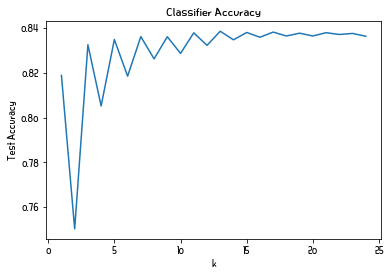

In [26]:
import matplotlib.pyplot as plt
k_list = range(1,25)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
  classifier.fit(X_train, y_train)
  accuracies.append(classifier.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.title("Classifier Accuracy")
plt.show()